# Chapter 3. Clustering

## input data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
num_points=2000
vectors_set=[]

for i in range(num_points):
    if np.random.random()>0.5:
        vectors_set.append([np.random.normal(0.,0.9),np.random.normal(0.,0.9)])
    else:
        vectors_set.append([np.random.normal(3.,0.5),np.random.normal(1.,0.5)])

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


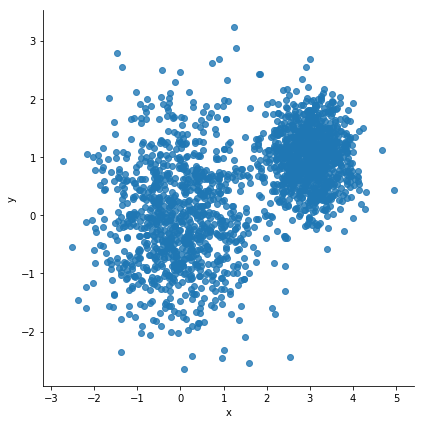

In [3]:
df=pd.DataFrame({"x":[v[0] for v in vectors_set],"y":[v[1] for v in vectors_set]})
sns.lmplot("x","y",data=df,fit_reg=False,size=6)
plt.show()

## K means implementation

In [4]:
vectors=tf.constant(vectors_set)
k=4
centroids= tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))

expanded_vectors=tf.expand_dims(vectors,0)
expanded_centroids=tf.expand_dims(centroids,1)

assignments=tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors,expanded_centroids)),2),0)
means=tf.concat([tf.reduce_mean(tf.gather(vectors,
                                         tf.reshape(tf.where(tf.equal(assignments,c)),[1,-1])),
                               reduction_indices=[1]) for c in range(k)],0)
update_centroids=tf.assign(centroids,means)

init_op=tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

for step in range(100):
    _,centroid_values,assignment_values=sess.run([update_centroids,centroids,assignments])

[[ 3.0111532   1.0064396 ]
 [ 0.87110645 -0.24631944]
 [-0.37144962  0.9279658 ]
 [-0.60518426 -0.7321286 ]]


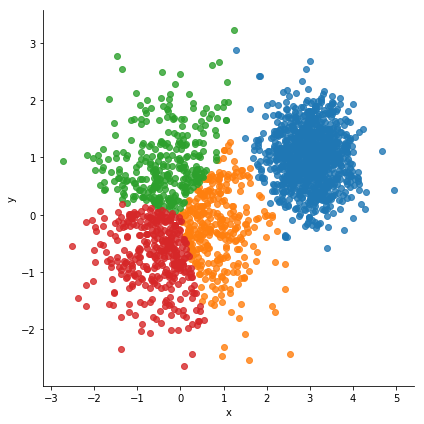

In [8]:
data={"x":[],"y":[],"cluster":[]}
for i in range(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])

print(centroid_values)
df = pd.DataFrame(data)
sns.lmplot("x","y",data=df,fit_reg=False,height=6,hue="cluster",legend=False)
plt.show()